## Oceanbolt Python SDK Lesson 3: Custom Polygons

This is the third lesson in our learning series for the Oceanbolt Python SDK. Make sure to check out the others on our blog: https://www.oceanbolt.com/blog/

In this notebook we will go through how you can use the Oceanbolt SDK to the count number of vessels within a user-defined / custom poygon. This notebook focuses on an Atlantic Polygon, counting the number of laden versus ballast Ultramaxes.

In [1]:
# Let us import the relevant modules
from oceanbolt.sdk.client import APIClient
from oceanbolt.sdk.data.tonnage import CustomPolygonTimeseries
from datetime import date
import time


In [2]:
# We set up the base client using our API key.
base_client = APIClient("<token>")


We will need coordinates for the Atlantic Ocean polygon to be able to populate the request body.
The gif below shows how to create polygons in your browers on https://geojson.io/ and get the required GeoJSON string.
<img src="atlantic_ocean_polygon.gif" width="500" align="center">

NOTE: The polygon is rather crude and users may actually be more diligent in properly drawing the polygons.

We use the copied string to populate our request body in the cell below.

In [3]:
# By using the polygon, that we created above, we can now get the timeseries of the number of Ultramaxes in the Atlantic Ocean.
# To illustrate the speed of the Oceanbolt Data Platform, we introduce a time count

start = time.time()

df_ultra_laden = CustomPolygonTimeseries(base_client).get(
    geojson="{\"type\":\"Polygon\",\"coordinates\":[[[-48.515625,61.10078883158897],[-81.5625,29.53522956294847],[-66.796875,13.239945499286312],[-50.2734375,1.0546279422758869],[-33.046875,-5.615985819155327],[-53.0859375,-34.88593094075315],[-70.3125,-50.736455137010644],[-64.6875,-56.170022982932046],[-25.3125,-56.94497418085159],[18.984375,-46.07323062540835],[18.984375,-29.22889003019423],[9.4921875,4.214943141390651],[-13.0078125,5.61598581915534],[-17.2265625,20.3034175184893],[-7.734374999999999,35.17380831799959],[-12.3046875,50.28933925329178],[-14.765625,62.75472592723178],[-48.515625,61.10078883158897]]]}",
    #Polygon coordinates corresponding to polygon that we drew. 
    sub_segment=['ultramax'],
    laden_status=['laden'],
    start_date=date(2019,1,1),
    end_date=date(2021,3,25),
)

end = time.time()
print(f"The Oceanbolt Data Platform spent {end - start} seconds calculating the number of laden Ultramaxes in our custom polygon")

The Oceanbolt Data Platform spent 0.7095351219177246 seconds calculating the number of laden Ultramaxes in our custom polygon


0.7 seconds to get 2 years and 3 months of historical data from a polygon that we just created. Not bad. Let us get the number of ballasting Ultramaxes.

In [4]:
# Next, we get the number of ballast Ultramaxes in our polygon.

start = time.time()

df_ultra_ballast = CustomPolygonTimeseries(base_client).get(
    geojson="{\"type\":\"Polygon\",\"coordinates\":[[[-48.515625,61.10078883158897],[-81.5625,29.53522956294847],[-66.796875,13.239945499286312],[-50.2734375,1.0546279422758869],[-33.046875,-5.615985819155327],[-53.0859375,-34.88593094075315],[-70.3125,-50.736455137010644],[-64.6875,-56.170022982932046],[-25.3125,-56.94497418085159],[18.984375,-46.07323062540835],[18.984375,-29.22889003019423],[9.4921875,4.214943141390651],[-13.0078125,5.61598581915534],[-17.2265625,20.3034175184893],[-7.734374999999999,35.17380831799959],[-12.3046875,50.28933925329178],[-14.765625,62.75472592723178],[-48.515625,61.10078883158897]]]}",
    sub_segment=['ultramax'],
    laden_status=['ballast'],
    start_date=date(2019,1,1),
    end_date=date(2021,3,25),
)

end = time.time()
print(f"The Oceanbolt Data Platform spent {end - start} seconds calculating the number of laden Ultramaxes in our custom polygon")

The Oceanbolt Data Platform spent 0.4720616340637207 seconds calculating the number of laden Ultramaxes in our custom polygon


This operation was slightly faster at 0.5 seconds. Great, we are ready to plot the timeseries.

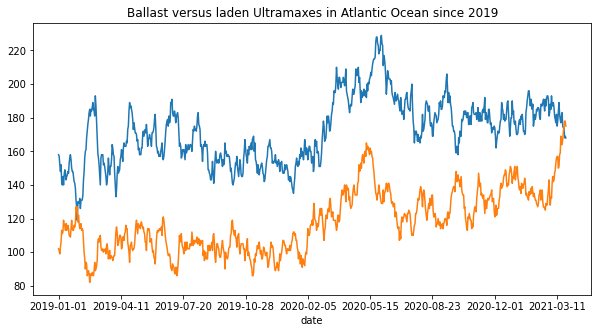

In [6]:
# Let us plot the results.

df_ultra_laden['ballast'] = df_ultra_ballast['value']

df_ultra_laden.plot(x='date', y=['value', 'ballast'], figsize=(10,5), title='Ballast versus laden Ultramaxes in Atlantic Ocean since 2019', legend=False);